<a href="https://colab.research.google.com/github/Sakib1605/Ames_Housing_Dataset_Analysis/blob/main/Data6100Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Mohammad Sakibul Islam

**ID:** 1265299

#**Executive Summary**

To predict the sale price of unseen data, first I load the training dataset. Then I clean data by handling missing values. Also I convert the categorical variable with specific order into numeric values based on rank and for the categorical variable with no meaningful order, I convert each unique category in columns where 1 is used for representing that category.

Then I drop the redundant features that convey almost the same information to reduce model complexity. Also I drop the data that are exceptionally far from usual values to improve model predictions.


After pre-processing of data, for model tuning I split the entire training data into 5 subsets. Then I iteratively train the model on 4 subsets and calculate error on the remaining subset  and do this 5 times to utlize all information in the trainig dataset to ensure that model shows consistency and finally calculate average of these errors.

Then to find the best model features, I iteratively add one feature at a time and calculate the error for that model. Thus I find the model with features that has the minimum error. Then again train the model using the entire training dataset to improve model predictions.

Then to predict the target variable, I load housing test data and after processing of test data, the sales prices for houses are predicted for the selected model.









In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Training Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Housing_Data_Train.csv', index_col = 0)
df = df.drop('Id' , axis =1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000
1,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
2,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900
3,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000
4,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213


#**Data Pre-processing**



##*   **Handle Missing Values**


####**1.   Drop the columns with High proportions of missing values**

First I calculated the proportion of missing values in each column and then sort them in descending order to see the columns with higher ratio of missing values. As PoolQC, MiscFeature and  Alley has more than 90 percent of missing values, I dropped these three columns.

####**2.  Replacing the NaN values for categorical and numeric columns**
  
I replaced NaN values with string 'NaN' for the categorical columns having missing values and for numeric columns replaced 'NaN' with 0.

####**3.  Impute Missing values**

The lot frontage values  are associated with the specific neighbouhood in which the house is located. So I group the data by neighbourhood and replace the missing values for lot frontage with the mean value of lotfront for each individual neighbourhood.

##* **Ordinal Mapping for relevant features**
Ordinal mapping assigns numeric values for categorical variables with order. So I map the ordinal quality ratings of house features (kitchen quality, garage quality etc) from categorical values to numeric values.

##* **One-hot-encoding for non-ordinal features**
while converting non-ordinal features to one-hot-encoding, each unique category is represented as a column, and if a data point falls in that catergory, 1 is assigned for that column and 0 otherwise.

##* **Drop one of the high correlated pairs**
When the pairwise correlation high, that means that both the features convey almost the same information which results in reduncdancy. So, after finding the highly correlated feature pairs, removing one of the features that has lower correlation with target varibale reduces model complexity.


##* **Handle Outliers**


*   Generating Box plots for identifying outliers

    After finding the features that have high correlation with target variable Sales price, I generate a boxplot for finding outliers and drop the values for that features that are significantly different from majority of data.
*   Using Local Outlier Factor for detecting outliers

    After detecting the oultiers by considering the local density of each data point by comparing to its nearest neighbours, I drop the outliers.


Handling Missing Values

In [ ]:
# proportion of missing values in each column
missing_data = df.isna().sum() / len(df)
# sorting tha columns with descending order of proportion of missing value
missing_data = missing_data[missing_data>0].sort_values(ascending = False)
#print the proportion of missing data in ascending order
missing_data


PoolQC          0.995
MiscFeature     0.964
Alley           0.934
Fence           0.815
FireplaceQu     0.465
LotFrontage     0.186
GarageType      0.061
GarageYrBlt     0.061
GarageFinish    0.061
GarageQual      0.061
GarageCond      0.061
BsmtExposure    0.026
BsmtFinType2    0.026
BsmtFinType1    0.025
BsmtCond        0.025
BsmtQual        0.025
MasVnrArea      0.006
MasVnrType      0.006
Electrical      0.001
dtype: float64

<BarContainer object of 19 artists>

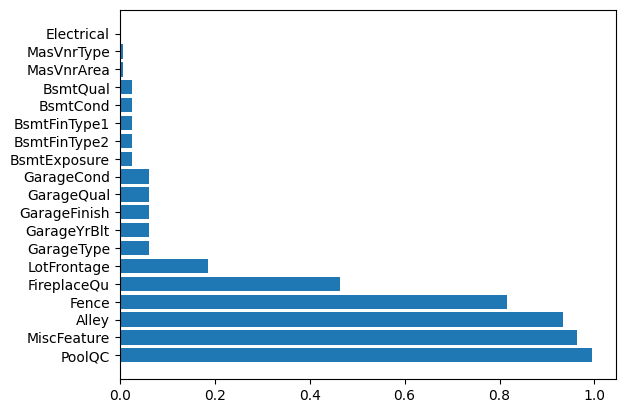

In [ ]:
# Create a bar plot to better visualize
plt.barh(missing_data.index, missing_data.values)

In [ ]:
#Drop columns with high proportion of missing values
df = df.drop(['Alley','MiscFeature','PoolQC'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1000 non-null   int64  
 1   MSZoning       1000 non-null   object 
 2   LotFrontage    814 non-null    float64
 3   LotArea        1000 non-null   int64  
 4   Street         1000 non-null   object 
 5   LotShape       1000 non-null   object 
 6   LandContour    1000 non-null   object 
 7   Utilities      1000 non-null   object 
 8   LotConfig      1000 non-null   object 
 9   LandSlope      1000 non-null   object 
 10  Neighborhood   1000 non-null   object 
 11  Condition1     1000 non-null   object 
 12  Condition2     1000 non-null   object 
 13  BldgType       1000 non-null   object 
 14  HouseStyle     1000 non-null   object 
 15  OverallQual    1000 non-null   int64  
 16  OverallCond    1000 non-null   int64  
 17  YearBuilt      1000 non-null   int64  
 18  YearRemod

In [ ]:
# list of categorical columns with missing values
categorical_columns_with_nan = ['Electrical','GarageType','GarageFinish','GarageCond','GarageQual',
                                'Fence','FireplaceQu','BsmtExposure','BsmtCond','BsmtQual',
                                'BsmtFinType1','BsmtFinType2','MasVnrType']
#Replace NaN value with string 'NaN'
df[categorical_columns_with_nan] = df[categorical_columns_with_nan].fillna('NaN')


In [ ]:
#list of numeric columns with missing values
numeric_column_with_nan = ['MasVnrArea','GarageYrBlt']

#Replace NaN values with 0
df[numeric_column_with_nan] = df[numeric_column_with_nan].fillna(0)

Impute Missing values for LotFrontage

<Axes: xlabel='LotFrontage', ylabel='Neighborhood'>

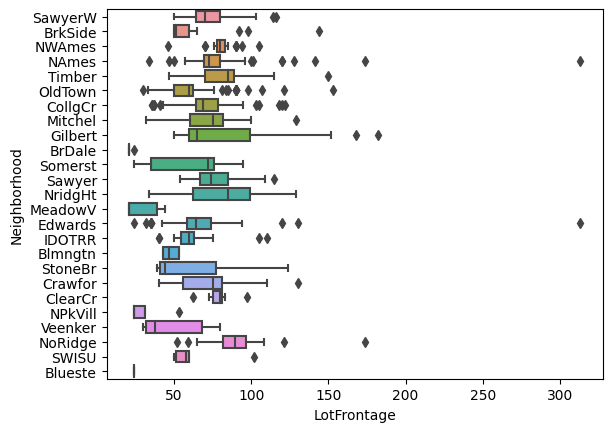

In [ ]:
#generate a boxplot to see the values of LotFrontage across each neighbourhood
sns.boxplot(data = df, x ='LotFrontage', y = 'Neighborhood')

In [ ]:
# group the data by neighbourhood and find mean value of lotFrontage for each individual neighbourhood
mean_lot_Frontage = df.groupby('Neighborhood')['LotFrontage'].transform('mean')

# Replace the missing values with this mean value for each neighbourhood
df['LotFrontage'] = df['LotFrontage'].fillna(mean_lot_Frontage)

In [ ]:
#Find if  any other  column with missing value exists
missing_data_check = df.isna().sum()
missing_data_check = missing_data_check[missing_data_check>0]
missing_data_check

Series([], dtype: int64)

Ordinal_Mapping

In [ ]:
# define ordinal mapping for quality

quality_map = {'Ex': 5 ,'Gd':4, 'TA':3, 'Fa':2, 'Po': 1, 'NaN':0}
columns_to_map_quality = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
                          'FireplaceQu','GarageQual','GarageCond','KitchenQual']
for col in columns_to_map_quality:
  df[col] = df[col].map(quality_map)

In [ ]:
# define ordinal mapping for fin type

fin_type_map = {'GLQ' : 6, 'ALQ' : 5 , 'BLQ': 4, 'Rec': 3,
                'LwQ': 2, 'Unf': 1, 'NaN': 0}
BsmtFinType = ['BsmtFinType1','BsmtFinType2']
for col in BsmtFinType:
  df[col] = df[col].map(fin_type_map)

In [ ]:
# define ordinal mapping for basement exposure quality
bsmt_exposure_quality = {'Gd': 4,'Av': 3, 'Mn': 2 , 'No': 1,'NaN':0}
df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_quality)

One-Hot-Encoding for non-ordinal value

In [ ]:
#get the categorical columne
categorical_data = df.select_dtypes(include = 'object')
#get the numerical columns
numerical_data = df.select_dtypes(exclude = 'object')
#ONE HOT ENCODING  FOR CATEGORICAL DATA
categorical_data  = pd.get_dummies(categorical_data)
#concatenating categorical and numeric columns
df = pd.concat([numerical_data, categorical_data], axis =1)

**Finding pairwise Highly Correlated Features**


In [ ]:
# this code portion was suggested to me by DATA 6200 course (notes on preprocessing)


#list to store the highly correlated features
correlated_features = []

#Calculate pairwise correlation
for i in range(len(df.columns)):
  for j in range(i+1, len(df.columns)):
    first_feature = df.columns[i]
    second_feature = df.columns[j]
    pairwise_correlation = df[first_feature].corr(df[second_feature])

    # if the correlation is above 0.95, then add the pair to the correlated_features
    if abs(pairwise_correlation) > 0.95 :
      correlated_features.append((first_feature, second_feature))

    #list to store the feature which will be dropped
    drop_features = set()
    # from the pairwise highly correlated features, drop one of the features that has lower
    # correlation with target 'SalePrice' variable
    for first_feature, second_feature in correlated_features :
      feature1_corr = df[first_feature].corr(df['SalePrice'])
      feature2_corr = df[second_feature].corr(df['SalePrice'])

      if(abs(feature1_corr) < abs(feature1_corr)):
        drop_features.add(first_feature)
      else:
        drop_features.add(second_feature)






In [ ]:
#highly correlated features
correlated_features

[('GarageYrBlt', 'GarageType_NaN'),
 ('GarageYrBlt', 'GarageFinish_NaN'),
 ('GarageQual', 'GarageCond'),
 ('Street_Grvl', 'Street_Pave'),
 ('Utilities_AllPub', 'Utilities_NoSeWa'),
 ('Exterior1st_CBlock', 'Exterior2nd_CBlock'),
 ('Exterior1st_CemntBd', 'Exterior2nd_CmentBd'),
 ('Exterior1st_MetalSd', 'Exterior2nd_MetalSd'),
 ('Exterior1st_VinylSd', 'Exterior2nd_VinylSd'),
 ('CentralAir_N', 'CentralAir_Y'),
 ('GarageType_NaN', 'GarageFinish_NaN'),
 ('SaleType_New', 'SaleCondition_Partial')]

In [ ]:
#dropping one from the pair of the  highly correlated features
df = df.drop(drop_features, axis = 1)
df.shape

(1000, 223)

Handling Outliers

In [ ]:
#First finding those features which have higher correlation with target feature
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice            1.000000
OverallQual          0.796024
ExterQual            0.678897
GarageCars           0.668395
KitchenQual          0.666980
                       ...   
MSZoning_RM         -0.322992
Foundation_CBlock   -0.349390
GarageType_Detchd   -0.368380
MasVnrType_None     -0.389298
GarageFinish_Unf    -0.418087
Name: SalePrice, Length: 223, dtype: float64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

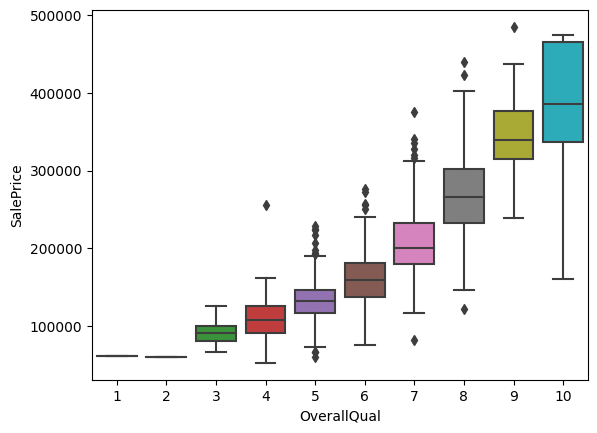

In [ ]:
##OverallQual has higher correlation with target feature
##We can remove outliers from OverallQual
##Generate A boxplot to find the outliers in OverallQual

sns.boxplot(df, x = 'OverallQual', y = 'SalePrice')

In [ ]:
##Removing the outliers from the OverallQual Feature
df = df[~ ((df['OverallQual'] == 9) & (df['SalePrice'] > 450000)) &
        ~ ((df['OverallQual'] == 8) & (df['SalePrice'] > 400000)) &
        ~ ((df['OverallQual'] == 8) & (df['SalePrice'] < 150000)) &
        ~ ((df['OverallQual'] == 7) & (df['SalePrice'] > 320000)) &
        ~ ((df['OverallQual'] == 7) & (df['SalePrice'] < 100000)) &
        ~ ((df['OverallQual'] == 6) & (df['SalePrice'] > 250000)) &
        ~ ((df['OverallQual'] == 5) & (df['SalePrice'] > 200000)) &
        ~ ((df['OverallQual'] == 4) & (df['SalePrice'] > 200000))]

Outliers using Local Outlier Factor

In [ ]:
#this code section was suggested to me by DATA 6200 class (preprocessing notes)

from sklearn.neighbors import LocalOutlierFactor

## a Local Outlier Factor model with number of neighbors parameter for calculation of LOF score
clf = LocalOutlierFactor (n_neighbors= 15,)
y_predict = clf.fit_predict(df)

#if the output is -1, then outliers
outliers = df[y_predict == -1]

##Removing the outliers
df = df.drop(outliers.index, axis =0)

In [ ]:
df.shape

(912, 223)

#**Modelling and Model Tuning**



##*   K- Fold Cross Validation

I split the entire housing training dataset into 5 equal sized  folds. So, by training the models on 4 folds (k-1) and testing the perfomance on the remaining subset by calculating the root mean squared error(rmse) for each fold, then finally calculating mean of these rmse values, I get the validation test set error.

So, the cross validation process helps in better assessment of model performance since the process trains the model on different subsets of data  and does not depend on a single validation set, ensures consistency without being biased on a particular subset.

##*   Forward Method for feature selection

In this method, I iteratively add one feature at a time to find the best model features having minimum error on test data.

##*  Usage of the entire training dataset to train the model

So,after finding the best model, again train the model on entire training dataset ensures utilization of all available information which results in more accurate predictions.







In [ ]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import chain, combinations
import statsmodels.api as sm

In [ ]:
## this code portion was suggested to me by DATA 6100 course github links for model selection
from sklearn.model_selection import KFold

## a method that fits a linear regression model for the selected subset of features
## also measures performance by calculating average rmse
##returns useful information for features selection
def processSubset(feature_set, X, y):
  #create a 5-fold cross-validation iterator
  kf = KFold( n_splits= 5, shuffle=True, random_state =42)

  #list to store rmse value
  list_rmse_val = []

  for train_index, test_index in kf.split(X):
    # split features and target variable in train and test dataset
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # a linear regression model
    model = sm.OLS(y_train, X_train[list(feature_set)])
    # fit the model to the training dataset
    regr = model.fit()
    # Calculate the root mean square error
    RMSE_val = float(np.sqrt(np.mean((regr.predict(X_test[list(feature_set)])- y_test) ** 2)))
    # append the rmse value to the list
    list_rmse_val.append(RMSE_val)
  #Calculate mean rmse value
  average_rmse = np.mean(list_rmse_val)

  # return information about number of features(p), list of feature names ('features'),
  # trained model object ('model') and root mean squared error (RMSE)
  return {'p': len(feature_set), 'features':feature_set, 'model':regr, 'RMSE': average_rmse}



In [ ]:
##this code portion was suggested to me by DATA 6100 course github links for model selection
# a method for feature selection by addding one feature at a time
def forward(predictors, X, y):
  # creating a list of feature columns which is not included in the predictors column parameter
  remaining_predictors = [col for col in X.columns if col not in predictors]

  #list to store number of parameters, model object, rmse and feature names
  results = []

  #Iterating through the feature columns
  for feature in remaining_predictors:
    results.append(processSubset(predictors + [feature], X, y))
  #store the results in a dataFrame
  models = pd.DataFrame(results)

  ##Find the model having lowest RMSE value
  best_model = models.loc[models['RMSE'].argmin()]

  return best_model



In [ ]:
## This code section was suggested to me by DATA 6100 course github links for model selection

# creating a dataframe to store information of number of features, root mean squared errot, list of features names,
# and trained model object
models = pd.DataFrame(columns =['p','RMSE','features','model'])

#list to store feature names
predictors = []
#get the total number of features
number_of_features = len(X.columns)
# iterating through the total number of features to find the model with lowest rmse value
for i in range(1,number_of_features +1):
  # call forward method to find the model having lowest rmse value
  models.loc[i] = forward(predictors, X, y)
  # store the list of features of this iteration in predictors
  predictors = models.loc[i]['model'].model.exog_names
#converting rmse values to float type
models['RMSE'] = models['RMSE'].astype(float)

Plot

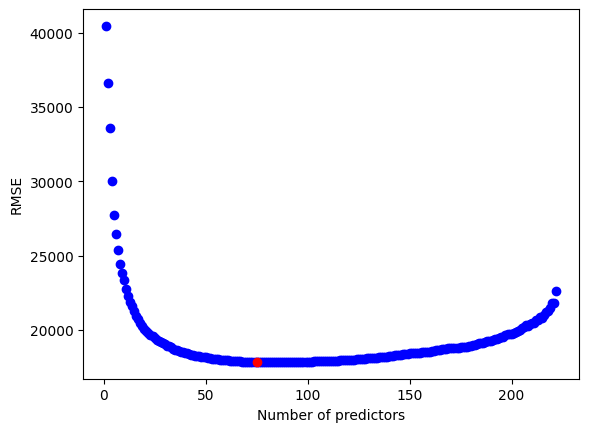

In [ ]:
##this code section was suggested to me by DATA 6100 course github link for model selection
##Generate a scatter plot for number of predictors vs root mean squared value
plt.plot(models['p'],models['RMSE'],'ob')

plt.xlabel("Number of predictors")
plt.ylabel ("RMSE")

# identifying the best performing model with lowest root mean squared value
plt.plot(models['p'][models['RMSE'].idxmin()],models['RMSE'].min(),'or')


In [ ]:
## viewing list of models with number features, names with rmse values
models

,p,RMSE,features,model
1,1,40451.182328,[OverallQual],<statsmodels.regression.linear_model.Regressio...
2,2,36599.196855,"[OverallQual, GarageArea]",<statsmodels.regression.linear_model.Regressio...
3,3,33568.634541,"[OverallQual, GarageArea, YrSold]",<statsmodels.regression.linear_model.Regressio...
4,4,30037.581294,"[OverallQual, GarageArea, YrSold, GrLivArea]",<statsmodels.regression.linear_model.Regressio...
5,5,27700.136632,"[OverallQual, GarageArea, YrSold, GrLivArea, T...",<statsmodels.regression.linear_model.Regressio...
...,...,...,...,...
218,218,21248.886607,"[OverallQual, GarageArea, YrSold, GrLivArea, T...",<statsmodels.regression.linear_model.Regressio...
219,219,21497.989842,"[OverallQual, GarageArea, YrSold, GrLivArea, T...",<statsmodels.regression.linear_model.Regressio...
220,220,21830.035936,"[OverallQual, GarageArea, YrSold, GrLivArea, T...",<statsmodels.regression.linear_model.Regressio...
221,221,21832.753702,"[OverallQual, GarageArea, YrSold, GrLivArea, T...",<statsmodels.regression.linear_model.Regressio...


Using the entire training dataset

In [ ]:
#method that fits a linear regression model for the selected subset of features
# return informations about feature names, rmse which is useful for feature selection
def processSubsetWithoutTestData(feature_set, X, y):
  #a linear regression model
  model = sm.OLS(y, X[list(feature_set)])
  #fit the model in the entire dataset
  regr = model.fit()
  #CALCULATE root mean squared value
  RMSE = float(np.sqrt(np.mean((regr.predict(X[list(feature_set)]) -y) ** 2)))
  ##return the information about number of features, list of feature names,
  ## train model object and root mean squared error
  return {'p': len(feature_set),'features': feature_set, 'model':regr, 'RMSE': RMSE }


In [ ]:
# a function for feature selection by adding one feature at a time on the entire training dataset
def forward_method_for_entire_training_data( predictors, X, y):
  #creating a list of feature column which is not included in the parameter 'predictors'
  #finding the predictors that still need to work on
  remaining_features = [col for  col in X.columns if col not in predictors]

  # list to store number of parameter, rmse, train model object and feature names
  results = []

  #iterating through the  remaining feature columns
  for col in remaining_features:
    ## store the results of number of parameter, rmse, train model object and feature names
    results.append(processSubsetWithoutTestData(predictors+[col],X,y))

  #store the results in a dataframe
  models =pd.DataFrame(results)

  # choosing the model with lowest rmse value
  best_model = models.loc[models['RMSE'].argmin()]

  return best_model


In [ ]:
##This code portion was suggested to me by DATA 6100 course github links for model selection

## Using the entire training data

##creating a data frame to store information of rmse and the model for the entire training data
models_with_noTestSet = pd.DataFrame(columns =['RMSE', 'model'])

#list to store feature names
predictor_features = []

#Iterate through the total number of features in the training data
number_of_features = len(X.columns)
for i in range(1, number_of_features +1):
  #calling the forward method to find the  features of model with lowest rmse value
  models_with_noTestSet.loc[i] = forward_method_for_entire_training_data(predictor_features,X, y)
  #listing the name of features of the selected model to predictor_features
  predictor_features = models_with_noTestSet.loc[i]['model'].model.exog_names

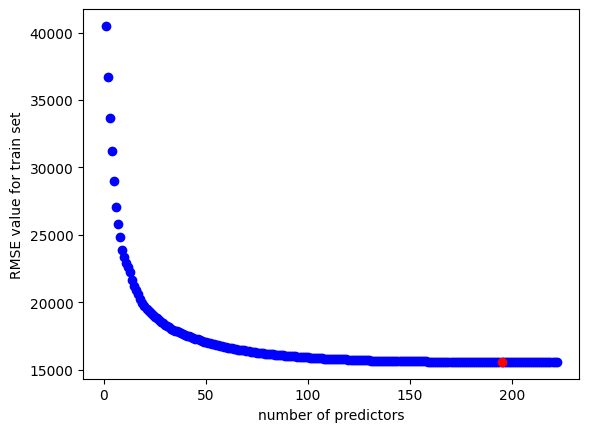

In [ ]:
## creating a plot for RMSE value for entire Train Dataset vs number of predictors
plt.plot(models_with_noTestSet['RMSE'],'ob')
plt.xlabel('number of predictors')
plt.ylabel('RMSE value for train set')

# identifying the point that have the lowest root mean squared value for training set
plt.plot(models_with_noTestSet['RMSE'].astype(float).idxmin(), models_with_noTestSet['RMSE'].min(),'or')


In [ ]:
features = models_with_noTestSet.loc[75,'model'].model.exog_names
features

['OverallQual',
 'GarageArea',
 'GarageType_Detchd',
 'GrLivArea',
 'YrSold',
 'TotalBsmtSF',
 'KitchenQual',
 'BsmtFinSF1',
 'SaleType_New',
 'LotArea',
 'ExterQual',
 'Neighborhood_Crawfor',
 'YearBuilt',
 'OverallCond',
 'Neighborhood_NridgHt',
 'BldgType_1Fam',
 'BsmtExposure',
 'Neighborhood_StoneBr',
 'Exterior1st_BrkFace',
 'BedroomAbvGr',
 'Neighborhood_NoRidge',
 'GarageFinish_RFn',
 'Neighborhood_Somerst',
 'BsmtCond',
 'Functional_Typ',
 'Condition1_Norm',
 'Neighborhood_BrkSide',
 'Exterior1st_Stucco',
 'WoodDeckSF',
 'LandSlope_Sev',
 'LandContour_HLS',
 'Fireplaces',
 'Foundation_PConc',
 'RoofStyle_Gable',
 'Neighborhood_Veenker',
 'Neighborhood_NPkVill',
 'GarageYrBlt',
 'SaleCondition_Abnorml',
 'Exterior1st_MetalSd',
 'GarageCars',
 'Condition1_RRAe',
 'HouseStyle_2.5Unf',
 'ScreenPorch',
 'BsmtFinType2',
 'Foundation_Wood',
 'HouseStyle_1Story',
 'Exterior1st_CemntBd',
 'BldgType_2fmCon',
 'MasVnrArea',
 'Exterior1st_VinylSd',
 'Neighborhood_BrDale',
 'BldgType_Twnhs

##**Demonstration of Overfitting vs Underfitting**

In case of overfitting, model tries fit all the points in the dataset including outliers, as a result, model performs tremendously well in the training dataset but as the model can not generalize well, it has a poor performance on test data.
For example, for housing data, an overfit model takes high number predictor variables into account than it's required, which results in inaccurate predictions for test dataset.

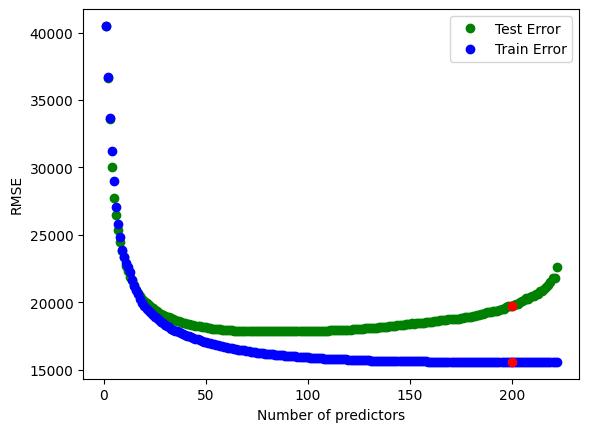

In [ ]:
##overfitting with high number of predictor variables
number_of_predictors =200

plt.plot(models['RMSE'], 'og', label ='Test Error')
plt.plot(number_of_predictors, models['RMSE'].loc[number_of_predictors],'or')
plt.plot(models_with_noTestSet['RMSE'],'ob', label ='Train Error')
plt.plot(number_of_predictors,models_with_noTestSet['RMSE'].loc[number_of_predictors],'or')
plt.xlabel('Number of predictors')
plt.ylabel('RMSE')
plt.legend()
plt.show()

So, from the plot , we can see that when number of is 200, the model is overfitted which results in low error in training data but but high error in test data.

In case of underfitting, the model is too simple and it performs poorly both on training and test dataset. This kind of model has a high bias as the predicted values are far from the true values, and has low variance becuase of lack of flexibility. For example, for housing data, an underfit model predicts sale price based on only few or low number of predictor varaiable. Since it lacks necessary relevant amount of predictor varibales, it provides predictions which are significanlty far from true values.

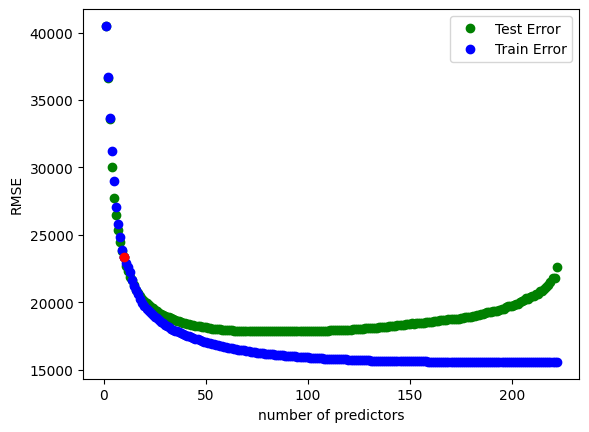

In [ ]:
##underfitting with having low number of predictors
number_of_predictors = 10
plt.plot(models['RMSE'],'og',label ='Test Error')
plt.plot(number_of_predictors, models['RMSE'].loc[number_of_predictors],'or')

plt.plot(models_with_noTestSet['RMSE'],'ob',label ='Train Error')
plt.plot(number_of_predictors, models_with_noTestSet['RMSE'].loc[number_of_predictors],'or')

plt.xlabel('number of predictors')
plt.ylabel('RMSE')
plt.legend()
plt.show()

So, from the plot , we can see that when number of is 10, the model is underfitted which results in high error in both test and test dataset.

Text(0, 0.5, 'RMSE  for training dataset')

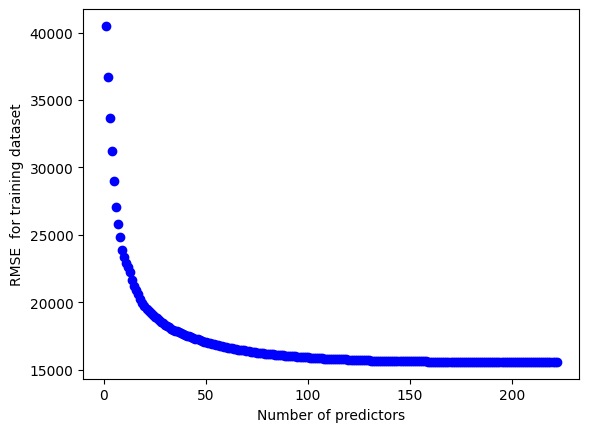

In [ ]:
##plotting rmse for train dataset vs number of predictors
plt.plot(models_with_noTestSet['RMSE'],'ob')
plt.xlabel('Number of predictors')
plt.ylabel('RMSE  for training dataset')

As we can see from the plot for rmse value for entire training data set, the error decrease as the number of variable predictors increases which indicates that underfit model having lower number of variable predictors has high error on train dataset while an overfit model having higher number of variable predictors provides less error in train dataset.

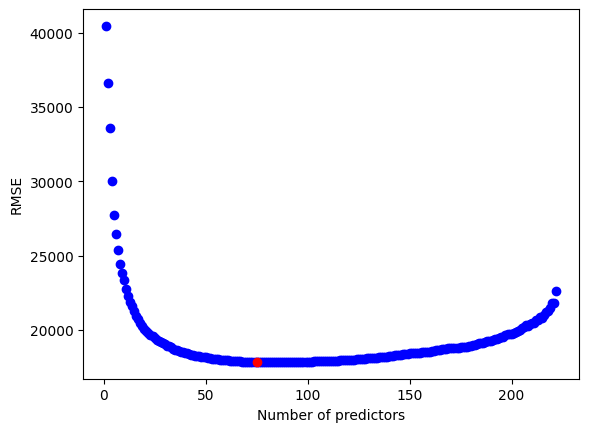

In [ ]:
# Generate a plot for RMSE value for test data vs Number of predictors
plt.plot(models['RMSE'],'ob')
plt.xlabel('Number of predictors')
plt.ylabel('RMSE')

#identifying the best performing model with lowest root mean squared value
plt.plot(models['p'][models['RMSE'].idxmin()],models['RMSE'].min(),'or')

The above U shape curve shows that when the number of predictors are too low that means model is too simple to predict the target variable accurately, the model results in unreliable predictions with higher error on unseen new data. As the number of predictors increase , the error decreases, but after reaching an optimal point where the error is minimum, with the increase of number of predictors, the test error starts to increase again. So, when the model is too complex having too many predictors and try to fit every data point resulting in high variance and high error rate on new unseen data.

So, when the number of predictor variables is high, due to overfitting the error in the training set is low but since the overfit model can not generalize properly and due to high variance, we can see a high test error. So, the generalization gap is higher in overfit model because the model can not predict well on test data but has low error in training dataset.

And when the number of predictor variables is too low, then due to high bias, a high train error can be observed. Also, since the model is too simple to predict the test dataset, which result in high test error. So, in case of underfitting, since both the train and test dataset error is high, the generalization gap is lower than the overfit model.

So, as we go from overfitting to underfitting, the generalization gap decreases.

##**Predict on the Test Dataset**

In [ ]:
#load test_data
test_df = pd.read_csv('/content/drive/MyDrive/Housing_Data_Test.csv', index_col = 0)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
2,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal
3,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
4,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml


Processing Test Dataset

In [ ]:
# list of categorical columns with missing values
categorical_columns_with_nan = ['Electrical','GarageType','GarageFinish','GarageCond','GarageQual',
                                'Fence','FireplaceQu','BsmtExposure','BsmtCond','BsmtQual',
                                'BsmtFinType1','BsmtFinType2','MasVnrType']
#Replace NaN value with string 'NaN'
test_df[categorical_columns_with_nan] = test_df[categorical_columns_with_nan].fillna('NaN')

# define ordinal mapping for quality
quality_map = {'Ex': 5 ,'Gd':4, 'TA':3, 'Fa':2, 'Po': 1, 'NaN':0}
columns_to_map_quality = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
                          'FireplaceQu','GarageQual','GarageCond','KitchenQual']
for col in columns_to_map_quality:
  test_df[col] = test_df[col].map(quality_map)

# define ordinal mapping for fin type
fin_type_map = {'GLQ' : 6, 'ALQ' : 5 , 'BLQ': 4, 'Rec': 3,
                'LwQ': 2, 'Unf': 1, 'NaN': 0}
BsmtFinType = ['BsmtFinType1','BsmtFinType2']
for col in BsmtFinType:
  test_df[col] = test_df[col].map(fin_type_map)

# define ordinal mapping for basement exposure quality
bsmt_exposure_quality = {'Gd': 4,'Av': 3, 'Mn': 2 , 'No': 1,'NaN':0}
test_df['BsmtExposure'] = test_df['BsmtExposure'].map(bsmt_exposure_quality)

#get the categorical columne
categorical_data = test_df.select_dtypes(include = 'object')
#get the numerical columns
numerical_data = test_df.select_dtypes(exclude = 'object')
#ONE HOT ENCODING  FOR CATEGORICAL DATA
categorical_data  = pd.get_dummies(categorical_data)
#concatenating categorical and numeric columns
test_df = pd.concat([numerical_data, categorical_data], axis =1)

##Adding new columns to test dataframe to match the column names of the training dataFrame
##And set zero values for the new added columns
new_columns =['Foundation_Wood','SaleType_Con','LotConfig_FR3']
for col in new_columns:
  test_df[col] = 0

#Replace all NaN values in the test dataFrame by 0
test_df = test_df.fillna(0)

In [ ]:
test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Foundation_Wood,SaleType_Con,LotConfig_FR3
0,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,1,0,0,0,0,1,0,0,0,0
1,9,50,51.0,6120,7,5,1931,1950,0.0,3,...,1,1,0,0,0,0,0,0,0,0
2,18,90,72.0,10791,4,5,1967,1967,0.0,3,...,1,0,0,0,0,1,0,0,0,0
3,19,20,66.0,13695,5,5,2004,2004,0.0,3,...,1,0,0,0,0,1,0,0,0,0
4,20,20,70.0,7560,5,6,1958,1965,0.0,3,...,0,1,0,0,0,0,0,0,0,0


#Predict sale price for housing test dataset

In [ ]:
#finding the features of the best model
features = models_with_noTestSet.loc[75,'model'].model.exog_names
# a dataframe with the selected features from test_df
X = test_df[features]
#the best model that i get
model = models_with_noTestSet.loc[75,'model']
#get predicted values for the selected model
predictions = model.predict(X)


# convert the predictions to a list
list_predictions = predictions.tolist()
# convert the predicted values to integer
rounded_list_predictions = [ int(x) for x in list_predictions]

#Printing the list of integer predicted values
print(rounded_list_predictions)


[206264, 155433, 118202, 136379, 132556, 266018, 64797, 186205, 146102, 151455, 141440, 275854, 269359, 182244, 154314, 418421, 121503, 167430, 221399, 61710, 121615, 188418, 154875, 191788, 130037, 124436, 185195, 186366, 177385, 122202, 119792, 153880, 317578, 241278, 173325, 181032, 116559, 141576, 221627, 217640, 157476, 156051, 204260, 107736, 133480, 111334, 125804, 232900, 292526, 184327, 275256, 162030, 141638, 207669, 166298, 179819, 112457, 186835, 142219, 120428, 99281, 91580, 151049, 123611, 215743, 239686, 189802, 218685, 269753, 95358, 207792, 254444, 82595, 229886, 184824, 209965, 122610, 194916, 107549, 161380, 137779, 166124, 242659, 253185, 121208, 251155, 262854, 139902, 282134, 165056, 165492, 185050, 330032, 152523, 142751, 92062, 119907, 213849, 159472, 71541, 206930, 118292, 287698, 155844, 118516, 105646, 204764, 146795, 274723, 344557, 216157, 208161, 69479, 155864, 107695, 139567, 143655, 229766, 262898, 291030, 250544, 230225, 307273, 145969, 105982, 204678, 

#**FINAL MODEL**

So, the final model contains 75 predictor variable features results in minimum error in test dataset.

The test MSE that was submitted to the leaderboard is 21508 .

In [ ]:
#print the features of the best model
features = models_with_noTestSet.loc[75,'model'].model.exog_names
features

['OverallQual',
 'GarageArea',
 'GarageType_Detchd',
 'GrLivArea',
 'YrSold',
 'TotalBsmtSF',
 'KitchenQual',
 'BsmtFinSF1',
 'SaleType_New',
 'LotArea',
 'ExterQual',
 'Neighborhood_Crawfor',
 'YearBuilt',
 'OverallCond',
 'Neighborhood_NridgHt',
 'BldgType_1Fam',
 'BsmtExposure',
 'Neighborhood_StoneBr',
 'Exterior1st_BrkFace',
 'BedroomAbvGr',
 'Neighborhood_NoRidge',
 'GarageFinish_RFn',
 'Neighborhood_Somerst',
 'BsmtCond',
 'Functional_Typ',
 'Condition1_Norm',
 'Neighborhood_BrkSide',
 'Exterior1st_Stucco',
 'WoodDeckSF',
 'LandSlope_Sev',
 'LandContour_HLS',
 'Fireplaces',
 'Foundation_PConc',
 'RoofStyle_Gable',
 'Neighborhood_Veenker',
 'Neighborhood_NPkVill',
 'GarageYrBlt',
 'SaleCondition_Abnorml',
 'Exterior1st_MetalSd',
 'GarageCars',
 'Condition1_RRAe',
 'HouseStyle_2.5Unf',
 'ScreenPorch',
 'BsmtFinType2',
 'Foundation_Wood',
 'HouseStyle_1Story',
 'Exterior1st_CemntBd',
 'BldgType_2fmCon',
 'MasVnrArea',
 'Exterior1st_VinylSd',
 'Neighborhood_BrDale',
 'BldgType_Twnhs